# Lab 12. 시계열 특성 간단 실습 (추세 분석, 계절성 분석, 자기 상관성 분석)
---

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose   # 계절성, 추세, 전차 분해하는 기능 제공하는 패키지 함수 
from statsmodels.graphics.tsaplots import plot_acf    # 자기 상관 패키지 함수 

- 시계열 데이터를 생성한 후, CSV 파일로 저장 및 불러와서 확인해본다.

In [2]:
# 시계열 데이터 생성 
np.random.seed(42)
dates = pd.date_range(start="2023-01-01", periods=1000, freq='D')
values = np.random.randn(1000)

# 데이터 프레임 생성 
data = pd.DataFrame({
    'Date' : dates,
    'Value' : values
})


# 데이터 프레임을 CSV 저장 
data.to_csv("./data/sample_time_data.csv", index=False, encoding='utf-8')

# 저장한 CSV 파일 읽기 
data = pd.read_csv("./data/sample_time_data.csv", parse_dates=['Date'] , index_col='Date')

print(data)

               Value
Date                
2023-01-01  0.496714
2023-01-02 -0.138264
2023-01-03  0.647689
2023-01-04  1.523030
2023-01-05 -0.234153
...              ...
2025-09-22 -0.281100
2025-09-23  1.797687
2025-09-24  0.640843
2025-09-25 -0.571179
2025-09-26  0.572583

[1000 rows x 1 columns]


- 시각화를 진행해본다.

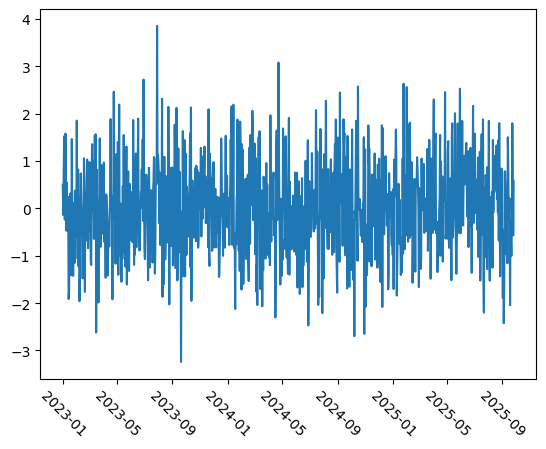

In [3]:
plt.plot(data.index, data['Value'])
plt.xticks(rotation=-45)  

plt.show()

- 추세를 분석해본다.

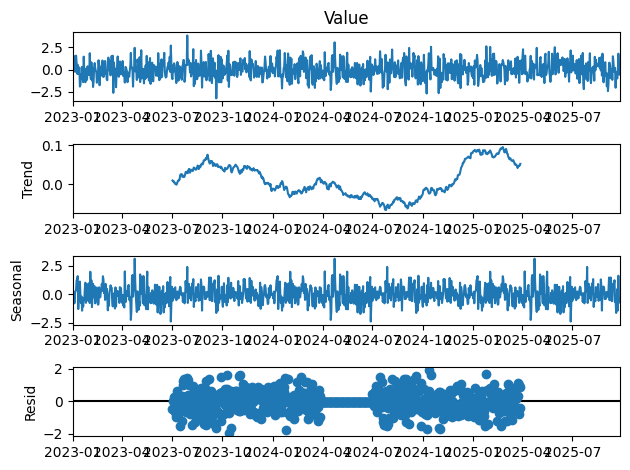

In [4]:
# 추세 분석 
result = seasonal_decompose(data['Value'], model='additive', period=365)
result.plot()

plt.show()

- 계절성을 분석해본다.

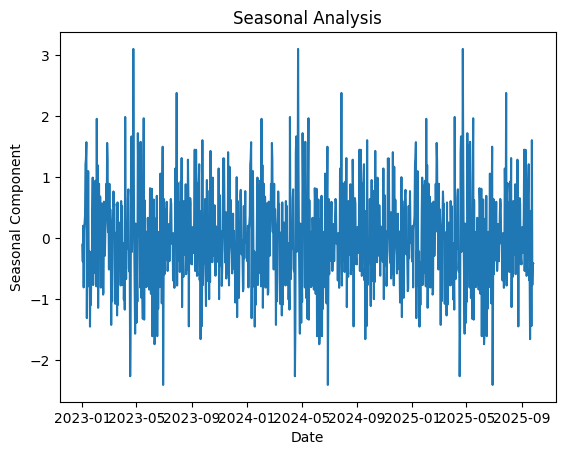

In [5]:
# 계절성 분석
seasonal_component = result.seasonal
plt.plot(seasonal_component)
plt.xlabel('Date')
plt.ylabel('Seasonal Component')
plt.title('Seasonal Analysis')

plt.show()